# Intro to ML

This assignment departs from the tradition of implementing everything from scratch and we will use a few libraries. First: `numpy`, the Python library for handling matrices.

In [1]:
#!pip install numpy

Next, `seaborn`, a library for easily plotting cute charts.

In [2]:
#!pip install seaborn

Finally, `scikit-learn`, a library implementing many ML algorithm

In [3]:
#!pip install 'scikit-learn>=0.23.0'

ERROR: Invalid requirement: "'scikit-learn"


Thorought the whole assignment you can - if you want - use the `numpy` library.

In [4]:
import numpy as np

We begin by defining a simple dataset, mapping flat areas in `areas` to their rental prices (in Arbitrary Units of Currency, AUC for short) in `prices`. Both lists are of the same length, and are in the same order, i.e., the `i`-th flat has the area `areas[i]` and can be rented for `prices[i]` AUC

In [5]:
areas = [77.0, 50.0, 44.0, 65.0, 65.0, 52.0, 48.0, 45.0, 45.0, 36.0, 53.0, 43.0, 53.0, 27.0, 100.0, 52.0, 84.0, 77.0, 42.0, 75.0, 47.0, 52.0, 64.0, 42.0, 85.0, 30.0]
prices = [282, 250, 262, 399, 285, 308, 336, 277, 275, 219, 332, 262, 334, 185, 370, 329, 179, 265, 237, 330, 265, 345, 307, 270, 355, 179]

## Task 1: Prediction in 1D linear regression

Complete the following `predict` function so that, given a list of features and the weights in linear regression. Assume that `w1` represents the slope, whereas `w0` is the intercept. `x` is a single-dimensional vector (e.g., a `list` of `float`s) such that every value corresponds to the single feature of another example. `predict` should return a vector of the same length `y`, such that $y_i = w_1x_i + w_0$

You can use the `numpy` library if it is convenient for you, but it is by no means necessary.

In [11]:
def predict(x, w1, w0):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = w1*x[i] + w0
    return y

Let's test it!

In [12]:
feature = [1, 2, 3]
expected = [10, 20, 30]
predicted = predict(feature, 10, 0)

assert (np.array(predicted) == np.array(expected)).all()

In [13]:
feature = [1, 2, 3]
expected = [11, 12, 13]
predicted = predict(np.array(feature), 1, 10)

assert (np.array(predicted) == np.array(expected)).all()

## Task 2: Training a 1D linear regression model

Complete the following cell of code so it iteratively improves the weights of the model to find the best line mapping `x` to `y`. Use the gradient descent algorithm presented during the lecture. Again, `x` and `y` are vectors, such that `x[i]` is the feature of the `i`-th example, whereas `y[i]` is the decision attribute (i.e., the value to approximate with the line). `w1` and `w0` given as the parameters are the initial values for the parameters of the model (i.e., the line), whereas `learning_rate` is the learning rate (denoted by $\eta$ in the slides). Finally, `max_iters` is the number of steps (weight updates) to do. `train_linear_regression` should return a pair of values `(w1, w0)` representing the best line approximating `y` given `x` according to the mean squared error.

Implement it on your own instead of using an implementation available in a library (e.g., `sklearn.linear_model.SGDRegressor`). You can, however, use `numpy` if it is convenient for you. 

**Hint**: implement the formulas given in slide 25 in the lecture slides.

In [32]:
def train_linear_regression(x, y, w1=0.0, w0=0.0, learning_rate=0.01, max_iters=10000):
    x = np.array(x)
    y = np.array(y)
    for _ in range(max_iters):        
        a1 = w1 - learning_rate*(1/len(x))*(sum([(w1*x[i] + w0 - y[i])*x[i] for i in range(len(x))]))
        a0 = w0 - learning_rate * (1/len(x)) * sum([w1*x[i] + w0 - y[i] for i in range(len(x))])
        w0 = a0
        w1 = a1        
    return (w1, w0)

Lets see how it works for a very simple case. The following cell should not fail.

In [33]:
x = [1, 2, 3]
y = [16, 26, 36]
w1, w0 = train_linear_regression(x, y)
print(f"Model: y = {w1}x + {w0}")
assert abs(w1 - 10) <= 0.01
assert abs(w0 - 6) <= 0.01

Model: y = 10.000003529431094x + 5.999991976773527


Let's train a model for the data on the rental prices (you may need to tweak `learning_rate` and/or `max_iters`):

In [34]:
w1, w0 = train_linear_regression(areas, prices, learning_rate=0.0001, max_iters=100000)
print(f"Model: price = {w1} * area + {w0}")

Model: price = 2.8208779632282344 * area + 120.98628676214645


And now let's see how the predictions and reality differ. Since comparing a bunch of numbers is inconvenient, we will plot a chart instead using the `seaborn` library. In the chart, the points represent the actual data, whereas the line is the output of the linear regression.

In [35]:
predicted_prices = predict(areas, w1, w0)

<AxesSubplot: >

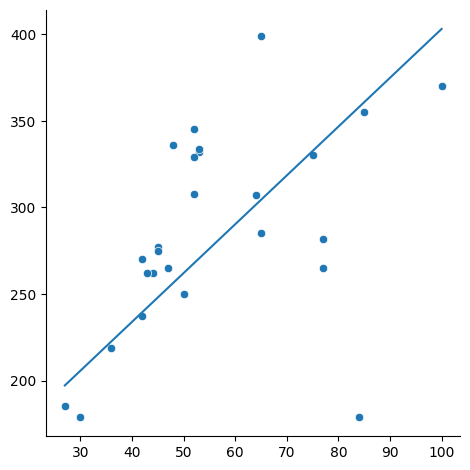

In [36]:
import seaborn as sns
sns.relplot(x=areas, y=prices)
sns.lineplot(x=areas, y=predicted_prices)

## Task 3: Mean-squared error

Comparing expected and predicted values on charts is not a very objective measure. Instead, it would be better to automate it. Complete the following function `mse` such that given two vectors `y_true` and `y_pred` of the same length, it returns the mean squared error, i.e., $$\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$ where $y$ stands for `y_true` and $\hat{y}$ for `y_pred`

In [37]:
def mse(y_true, y_pred) -> float:
    mean_squared_error = sum([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))])/len(y_true)
    return mean_squared_error    

Let's make sure it works

In [38]:
assert abs(mse([1, 2, 3], [2, 5, 7]) - ((1-2)**2 + (2-5)**2 + (3-7)**2)/3) < 0.001

## Interlude: ridge regression in scikit-learn

We will now use a slightly larger dataset called *diabetes*. We begin by loading it using a loader provied in the `scikit-learn` library

In [39]:
import sklearn.datasets
dataset = sklearn.datasets.load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Threre are 442 examples described by 10 features each, organized into a matrix `dataset.data`:

In [40]:
dataset.data.shape

(442, 10)

There is also a vector of values to predict:

In [41]:
dataset.target.shape

(442,)

In [42]:
print(f"The first example")
print("x[0]", dataset.data[0])
print("y[0]", dataset.target[0])

The first example
x[0] [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
y[0] 151.0


We need to split the dataset into three parts:
* a training set - to optimize the parameters of a model (e.g., the weights in the linear regression)
* a validation (development) set - to optimize the hyperparameters of a model (e.g., the coefficient $\alpha$ in the ridge regression)
* a test set - to see how well a model behaves on unseen data

In [43]:
import sklearn.model_selection
X, test_X, y, test_y = sklearn.model_selection.train_test_split(dataset.data, dataset.target, random_state=42, test_size=.2)
train_X, val_X, train_y, val_y = sklearn.model_selection.train_test_split(X, y, random_state=0xc0ffee, test_size=.125)
print("Training set (70% of 442):", train_X.shape, train_y.shape)
print("Validation set (10% of 442):", val_X.shape, val_y.shape)
print("Test set (20% of 442):", test_X.shape, test_y.shape)

Training set (70% of 442): (308, 10) (308,)
Validation set (10% of 442): (45, 10) (45,)
Test set (20% of 442): (89, 10) (89,)


Let's train a ridge regression model, i.e, a linear regression model with a regularization component to avoid overfitting.

In [44]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(train_X, train_y)

Ridge()

How well the model fares in terms of MSE on the training set?

In [45]:
pred = regressor.predict(train_X)
mse(train_y, pred)

3409.654408508753

And on the validation set?

In [46]:
pred = regressor.predict(val_X)
mse(val_y, pred)

3930.640843731399

Now let's see what happens if we use a different value of the hyperparameter $\alpha$

In [47]:
regressor = Ridge(alpha=10)
regressor.fit(train_X, train_y)
print("MSE on training:", mse(train_y, regressor.predict(train_X)))
print("MSE on validation:", mse(val_y, regressor.predict(val_X)))

MSE on training: 5105.066134980777
MSE on validation: 5786.834900747042


## Task 4: Hyperparameter optimization using the validation set

As you can see, the resulting values are very different. **Complete the function** below with some strategy to find the best value of the hyperparmeter `alpha` with respect to the mean-squared error `mse` on the validation set given as the parameters `val_X`, `val_y`. Use `train_X` and `train_y` as the training set. Return the best value of alpha. The strategy is up to you: you can use some set of fixed values, you can do something more elaborate. If you decide to use a fixed set of values, consider the cost function of the ridge regression and try to come up with a reasonable set of values (e.g., picking `[1, 1.1, 1.2]` is probably not that intersting)

In [85]:
def alpha_optimization(train_X, train_y, val_X, val_y) -> float:
    mean_sq_er = float('Inf')
    best_alpha = 0
    for i in range(10000):
        regressor = Ridge(alpha=(i/100)) #the same as making range(0, 100, 0.01) which is not possible to do in Python
        regressor.fit(train_X, train_y)
        curr_mse = mse(val_y, regressor.predict(val_X))
        if (mean_sq_er >= curr_mse):
            best_alpha = i/100
            mean_sq_er = curr_mse
    return best_alpha

In [86]:
best_alpha = alpha_optimization(train_X, train_y, val_X, val_y)
print("The best alpha is", best_alpha)

CPU times: total: 9.58 s
Wall time: 9.62 s
The best alpha is 0.05


## Task 5: Using the test set

Finally, let's use the test set! We will train a regressor using the best alpha and then evaluate it on all three sets. However, before we do it, **write in the cell below your prediction**: will MSE on the test set be better or worse than on the validation set?

**I predict that:** MSE on the test set will be greater than MSE on the validation set

In [89]:
regressor = Ridge(alpha=best_alpha)
regressor.fit(train_X, train_y)
print("MSE on training:", mse(train_y, regressor.predict(train_X)))
print("MSE on validation:", mse(val_y, regressor.predict(val_X)))
print("MSE on test:", mse(test_y, regressor.predict(test_X)))

MSE on training: 2854.8711620433646
MSE on validation: 3332.0348919066982
MSE on test: 2825.4288063135127


**Is the result consistent with your prediction, or did something surprise you? Comment on the result in the cell below.**

Actually not. The reason behind it is that even though validation set was used to find best_alpha, it doesn't mean that all other data sets will perform worse on that model. Here test set was more coincident with linear regression than validation set and it resulted in smaller MSE, which of course can happen.